In [1]:
# -*- coding=utf-8 -*-

In [9]:
import os, codecs  
#import jieba  
import numpy as np
from collections import Counter 
import matplotlib.pylab as plt
plt.style.use('ggplot')
import pandas as pd
import matplotlib

In [29]:
plt.rcParams['font.style'] = u'normal'
plt.rcParams['font.family'] = u'Microsoft YaHei'

matplotlib.font_manager.findSystemFonts()

with codecs.open('output.txt', 'r', 'utf8') as f:  
    txt = f.read() 
seg_list = jieba.cut(txt) 
c = Counter()  
for x in seg_list:  
    if len(x)>1 and x != '\r\n':  
        c[x] += 1
np.savetxt('count10000.txt',np.array(c.most_common(10000)),fmt='%s')

In [13]:
data = np.loadtxt('count10000.txt',dtype='str')
with codecs.open('output.txt', 'r', 'utf8') as f:  
    txt = f.read() 
wordlist = np.array(txt.split(' '))
wordlist.shape

(405090,)

In [14]:
countlist = []
for i in range(10000):
    countlist.append(data[i,0]+': '+str(data[i,1]))
pd.DataFrame(np.array(countlist)[:200].reshape(20,10)).head()

,0,1,2,3,4,5,6,7,8,9
0,邓小平: 4859,中国: 2613,他们: 1624,毛泽东: 1226,工作: 990,没有: 873,干部: 802,问题: 794,北京: 764,一个: 763
1,自己: 715,美国: 659,领导人: 647,但是: 638,会议: 595,一些: 582,经济: 577,11: 559,关系: 557,香港: 542
2,1975: 520,领导: 513,12: 508,胡耀邦: 491,10: 489,of: 486,苏联: 483,政治: 473,支持: 471,这些: 465
3,and: 464,军队: 452,认为: 447,陈云: 420,开始: 418,China: 412,很多: 410,政策: 403,其他: 401,赵紫阳: 399
4,周恩: 399,已经: 398,讲话: 391,这个: 390,可以: 390,17: 389,学生: 387,华国锋: 383,改革: 380,日本: 380


In [15]:
namelist = [u'邓小平',u'中国',u'毛泽东',u'工作',u'干部',u'问题',u'北京',u'美国',u'领导人',u'会议',u'经济',u'关系',u'香港',u'1975',u'领导',u'胡耀邦',u'苏联',u'政治',u'支持',
u'军队',u'陈云',u'政策',u'赵紫阳',u'周恩',u'讲话',u'学生',u'华国锋',u'改革',u'日本']
index_25 = [0,1,3,4,6,7,8,11,12,14,16,20,21,23,26,27,28,31,33,37,39,40,42,46,47,48,49]

Text(0.5,1,u'27 key words frequency in book')

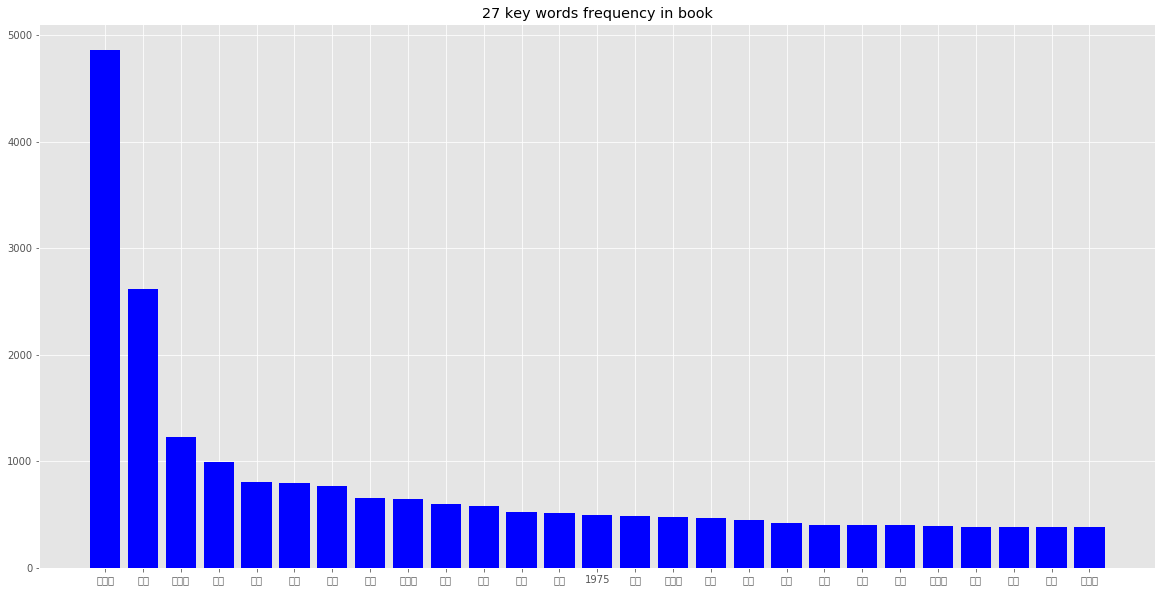

In [43]:
count = 27
fig,ax=plt.subplots(1,figsize=(20,10))
ax.bar(range(count),data[index_25,1].astype('int'),color = 'b')
#ax.bar(range(count),data[:count,1].astype('int'))
ax.set_xticks(range(count))
ax.set_xticklabels(namelist)
#plt.savefig('tst.png')
ax.set_title(str(count)+' key words frequency in book')

for i in range(23):
    print np.where(np.array(wordlist) ==u'第'+str(i+1))
np.where(np.array(wordlist) ==u'章')
for i in range(chapterind .shape[0]):
    print wordlist[chapterind [i]]

In [17]:
chapterind = np.array([16590,  31267,  54053,69769,  90171, 104745,121010, 138136,  147048,  161724,170963,  193593, 206502, 214129,230193, 
                245828,  260400,285768, 303284, 324922, 337101, 349241, 362426, 377184])-1

In [18]:
def count_frequent(chap):
    freqlist =[]
    if chap <23:
        for i in range(27):
            freqlist.append(np.where(wordlist[chapterind[chap]:chapterind[chap+1]] ==namelist[i])[0].shape[0])
    else:
        for i in range(27):
            freqlist.append(np.where(wordlist[chapterind[chap]:] ==namelist[i])[0].shape[0])
    return np.array(freqlist)

In [19]:
freq_var = np.ndarray([24,27])
for i in range(24):
    freq_var[i] = count_frequent(i)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformed = scaler.fit_transform(freq_var)

[Text(0,0,u'\u9093\u5c0f\u5e73'),
 Text(0,0,u'\u4e2d\u56fd'),
 Text(0,0,u'\u6bdb\u6cfd\u4e1c'),
 Text(0,0,u'\u5de5\u4f5c'),
 Text(0,0,u'\u5e72\u90e8'),
 Text(0,0,u'\u95ee\u9898'),
 Text(0,0,u'\u5317\u4eac'),
 Text(0,0,u'\u7f8e\u56fd'),
 Text(0,0,u'\u9886\u5bfc\u4eba'),
 Text(0,0,u'\u4f1a\u8bae'),
 Text(0,0,u'\u7ecf\u6d4e'),
 Text(0,0,u'\u5173\u7cfb'),
 Text(0,0,u'\u9999\u6e2f'),
 Text(0,0,u'1975'),
 Text(0,0,u'\u9886\u5bfc'),
 Text(0,0,u'\u80e1\u8000\u90a6'),
 Text(0,0,u'\u82cf\u8054'),
 Text(0,0,u'\u653f\u6cbb'),
 Text(0,0,u'\u652f\u6301'),
 Text(0,0,u'\u519b\u961f'),
 Text(0,0,u'\u9648\u4e91'),
 Text(0,0,u'\u653f\u7b56'),
 Text(0,0,u'\u8d75\u7d2b\u9633'),
 Text(0,0,u'\u5468\u6069'),
 Text(0,0,u'\u8bb2\u8bdd'),
 Text(0,0,u'\u5b66\u751f'),
 Text(0,0,u'\u534e\u56fd\u950b')]

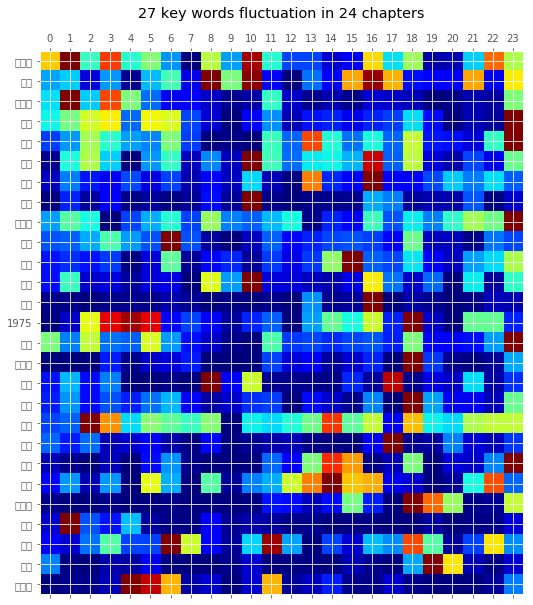

In [21]:
fig,ax=plt.subplots(1,figsize =(10,10))
ax.matshow(transformed.T ,cmap ='jet')
ax.set_title('27 key words fluctuation in 24 chapters')
ax.set_xticks(range(24))
ax.set_yticks(range(27))
ax.set_yticklabels(namelist)

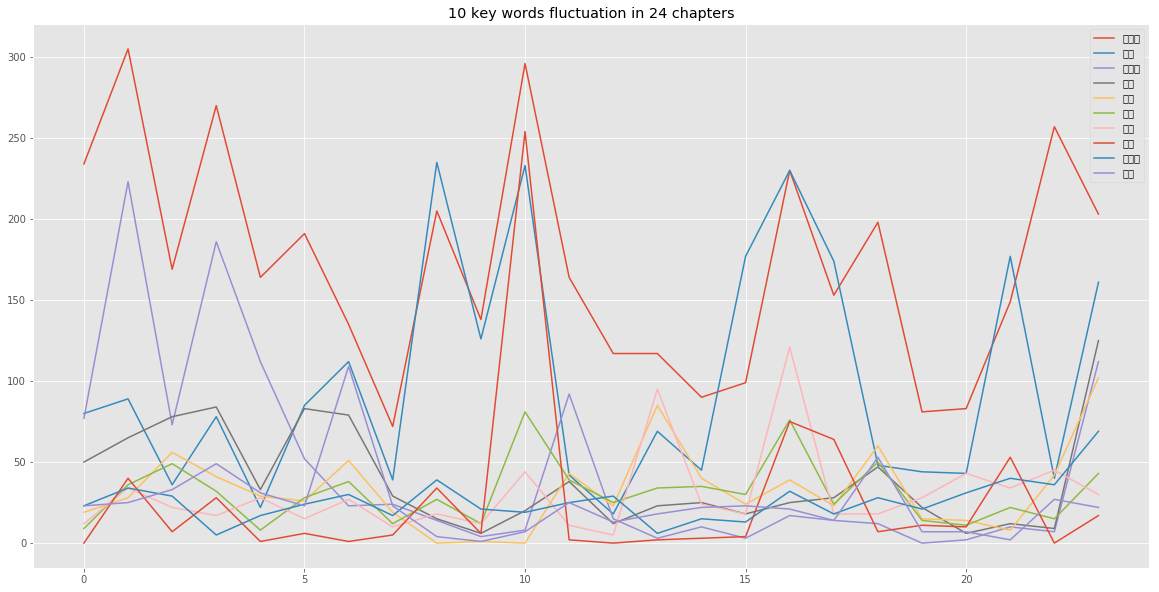

In [24]:
fig,ax=plt.subplots(1,figsize =(20,10))
#ax.plot(freq_var[:,:10])
count =10
for x,y in zip(freq_var[:,:count].T,namelist[:count]):
    plt.plot(x,label =y)
plt.title(str(count)+' key words fluctuation in 24 chapters')
plt.legend()
plt.show()

In [25]:
def calculate_distance(ind1,ind2):
    pos1 = np.where(wordlist==namelist[ind1])[0]
    pos2 = np.where(wordlist==namelist[ind2])[0]
    num1 ,num2 = pos1.shape[0],pos2.shape[0]
    if num1>num2:
        small = num2
        large = num1
        lararr = pos1
        smarr = pos2
    else:
        small = num1
        large = num2
        lararr = pos2
        smarr = pos1
    disarr = np.ndarray([small,large])  #each line calculate the small set's ith word's and large set's every words distance
    arr1= np.repeat(smarr,large).reshape(-1,large)
    arr2= np.repeat(lararr,small).reshape(-1,small).T
    mindis = np.min(np.abs(arr2-arr1),axis=1)
    return mindis

In [26]:
calculate_distance(0,1)

array([ 28,  26,  27, ...,   7, 372, 204])

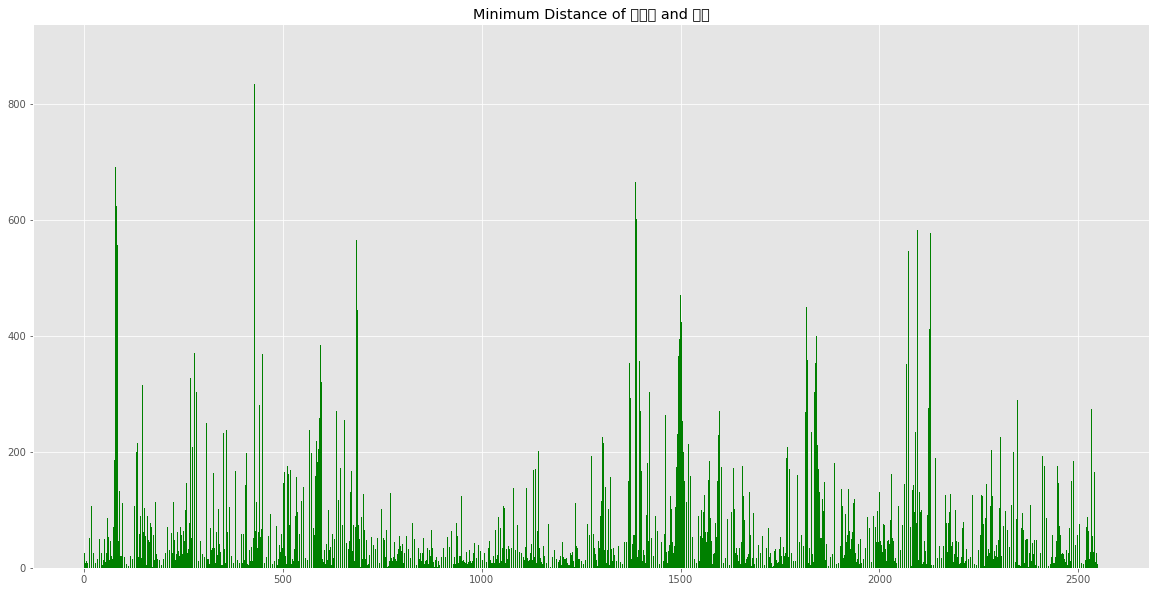

In [40]:
def draw_dist_count(ind1,ind2):
    fig,ax=plt.subplots(1,figsize=(20,10))
    ax.bar(range(calculate_distance(0,1).shape[0]),calculate_distance(0,1),color='g')
    ax.set_title('Minimum Distance of '+namelist[ind1]+" and "+namelist[ind2])
draw_dist_count(0,1)

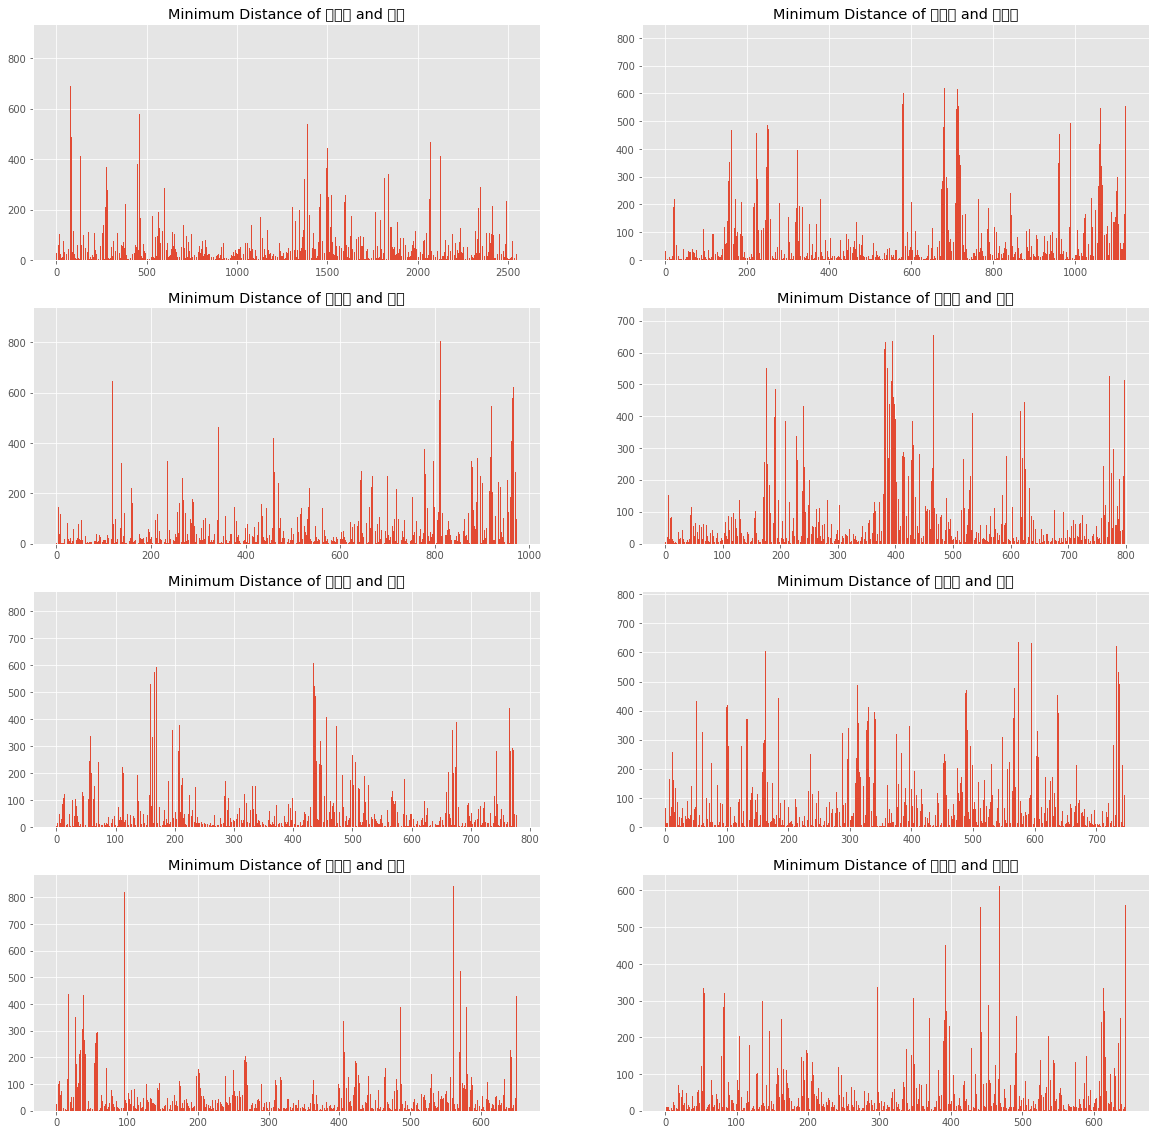

In [38]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
for i in range(4):
    for j in range(2):
        ax[i,j].bar(range(calculate_distance(0,1+2*i+j).shape[0]),calculate_distance(0,1+2*i+j))
        ax[i,j].set_title('Minimum Distance of '+namelist[0]+" and "+namelist[1+2*i+j])

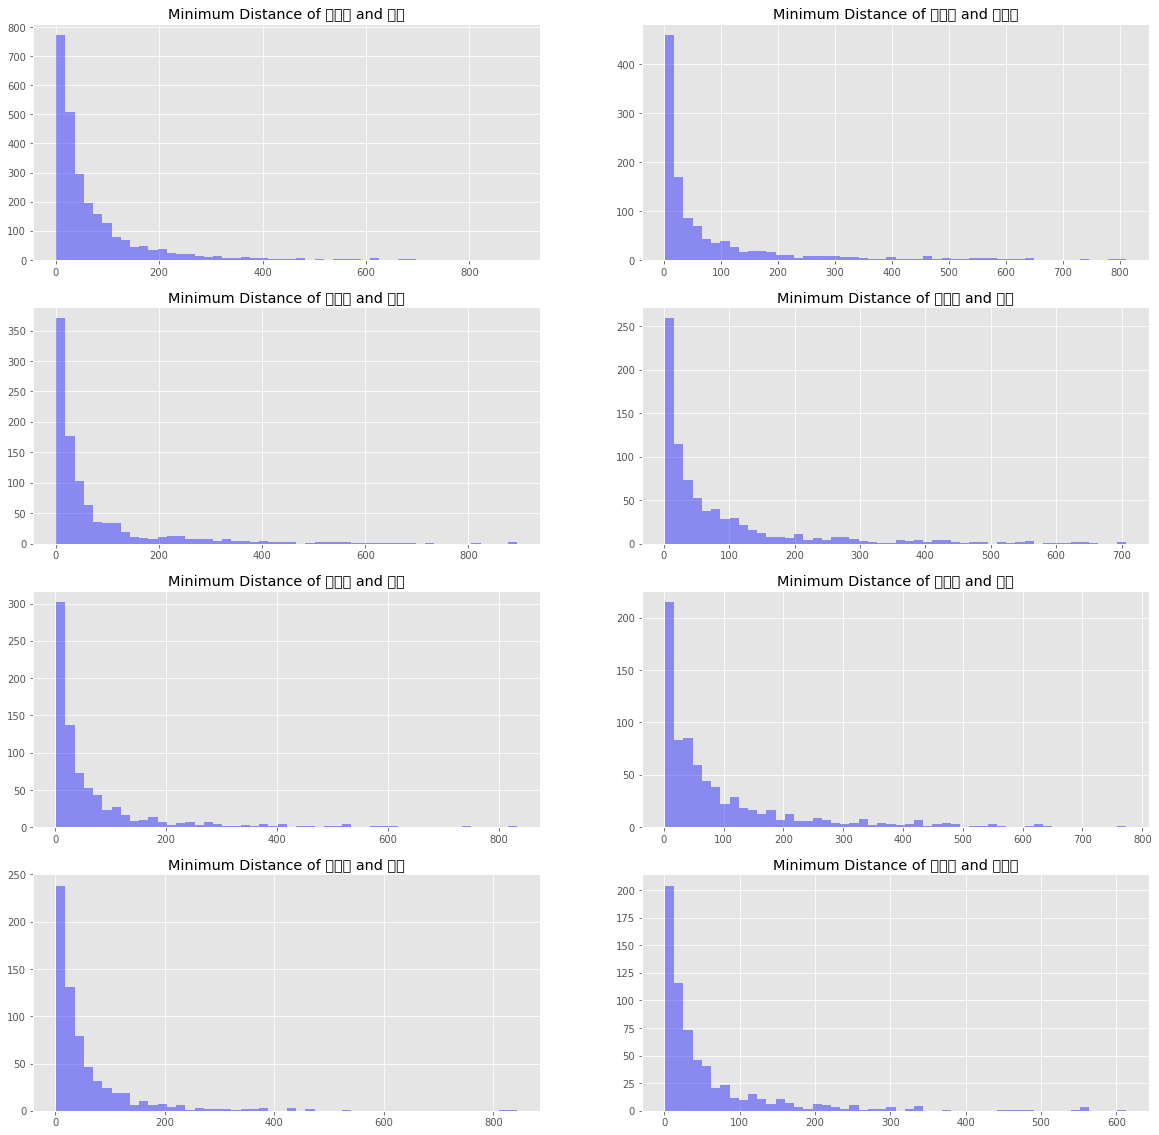

In [39]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
for i in range(4):
    for j in range(2):
        ax[i,j].hist(calculate_distance(0,1+2*i+j),bins =50,color='b',alpha=0.4)
        ax[i,j].set_title('Minimum Distance of '+namelist[0]+" and "+namelist[1+2*i+j])

In [58]:
dist_data = {}
for i in np.arange(1,20):
    dist_data[i] = calculate_distance(0,i)
dataframe_dxp = pd.concat((pd.DataFrame({namelist[i]:dist_data[i]}) for i in np.arange(1,20)),axis=1)

In [45]:
import seaborn as sns

[Text(0,0,u'\u4e2d\u56fd'),
 Text(0,0,u'\u6bdb\u6cfd\u4e1c'),
 Text(0,0,u'\u5de5\u4f5c'),
 Text(0,0,u'\u5e72\u90e8'),
 Text(0,0,u'\u95ee\u9898'),
 Text(0,0,u'\u5317\u4eac'),
 Text(0,0,u'\u7f8e\u56fd'),
 Text(0,0,u'\u9886\u5bfc\u4eba'),
 Text(0,0,u'\u4f1a\u8bae'),
 Text(0,0,u'\u7ecf\u6d4e'),
 Text(0,0,u'\u5173\u7cfb'),
 Text(0,0,u'\u9999\u6e2f'),
 Text(0,0,u'1975'),
 Text(0,0,u'\u9886\u5bfc'),
 Text(0,0,u'\u80e1\u8000\u90a6'),
 Text(0,0,u'\u82cf\u8054'),
 Text(0,0,u'\u653f\u6cbb'),
 Text(0,0,u'\u652f\u6301'),
 Text(0,0,u'\u519b\u961f')]

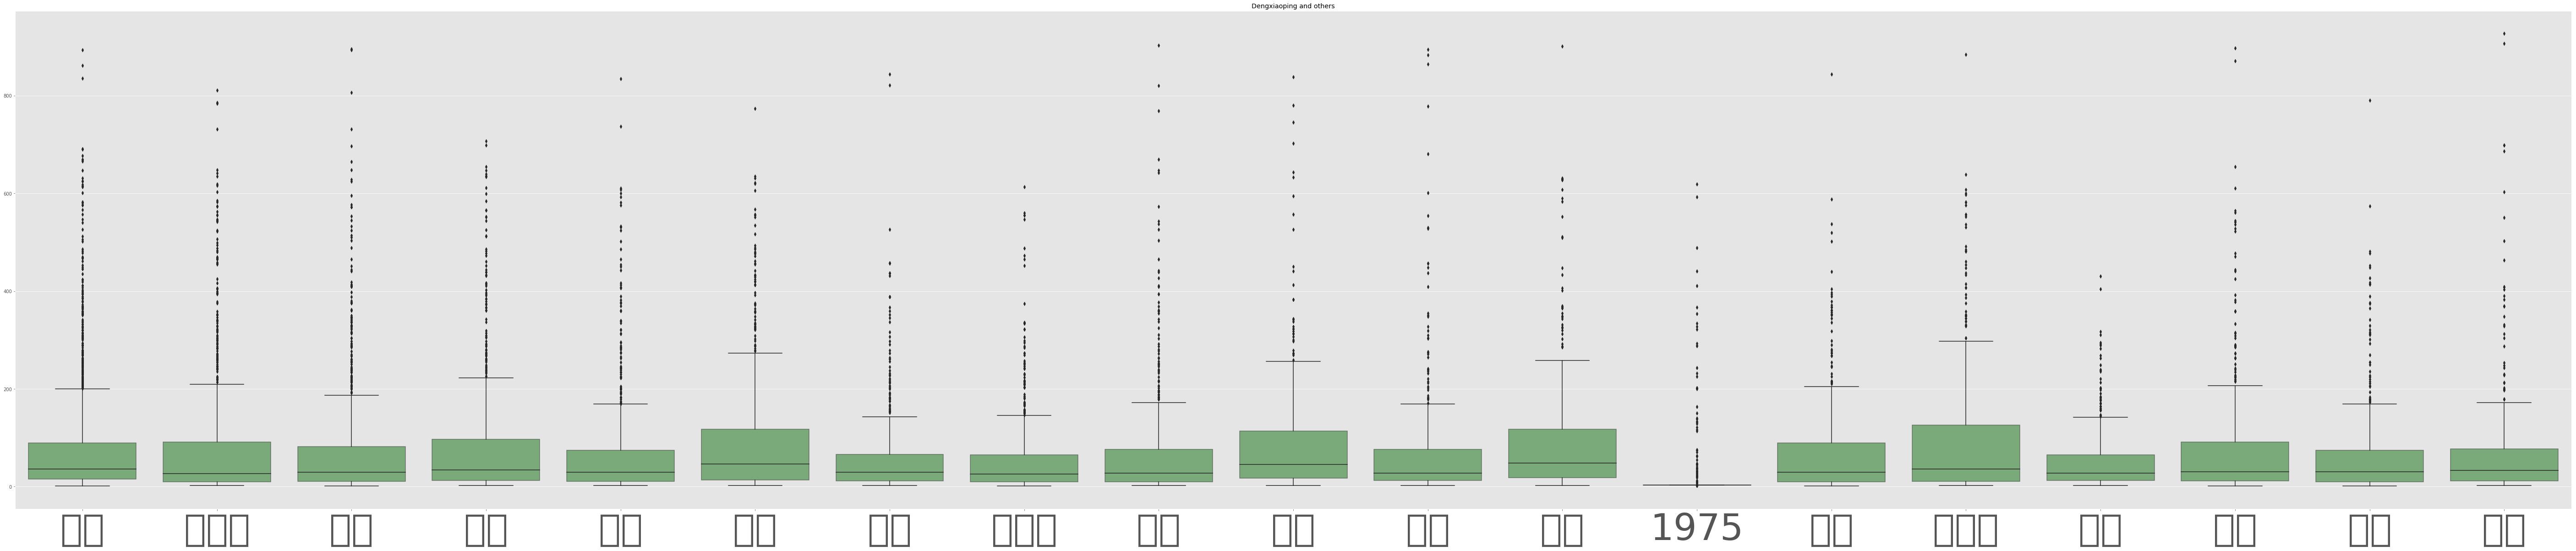

In [76]:
fig, ax = plt.subplots(figsize=(100,20))
sns.boxplot(data =dataframe_dxp,ax=ax,boxprops=dict(alpha=.5),color='g')
ax.set_title(u'Dengxiaoping and others')
ax.set_xticks(range(19))
ax.set_xticklabels(namelist[1:20],fontsize=80)
fig.savefig('boxplot.png')

print np.where(wordlist==namelist[10])[0].shape
print np.where(wordlist==namelist[9])[0].shape
arr1 = np.repeat(np.where(wordlist==namelist[10])[0],589).reshape(-1,589)
arr2=np.repeat(np.where(wordlist==namelist[9])[0],570).reshape(-1,570).T
np.abs(arr2-arr1).shape
np.min(np.abs(arr2-arr1),axis=1)

import matplotlib
matplotlib.matplotlib_fname()
plt.rcParams['font.family'] = 'SimHei'
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontManager
from pylab import mpl
import subprocess

def get_matplot_zh_font():
    fm = FontManager()
    mat_fonts = set(f.name for f in fm.ttflist)

    output = subprocess.check_output('fc-list :lang=zh -f "%{family}\n"', shell=True)
    zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
    available = list(mat_fonts & zh_fonts)

    print '*' * 10, '可用的字体', '*' * 10
    for f in available:
        print f
    return available

def set_matplot_zh_font():
    available = get_matplot_zh_font()
    if len(available) > 0:
        mpl.rcParams['font.sans-serif'] = [available[0]]    # 指定默认字体
        mpl.rcParams['axes.unicode_minus'] = False 